Load the dataset (customer_data_records.csv), process some clusters of your choice and then visualize them to see the distribution.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster


In [13]:
df = pd.read_csv('../files/customer_data_records.csv')
print(df.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [14]:
# processing data for clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [15]:
kmeans = cluster.KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
df['Cluster'] = kmeans.labels_
df

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster
0,1,117,20,0
1,2,107,59,2
2,3,29,36,3
3,4,121,19,0
4,5,86,90,1
...,...,...,...,...
169,170,111,76,2
170,171,138,87,2
171,172,84,15,0
172,173,107,92,2


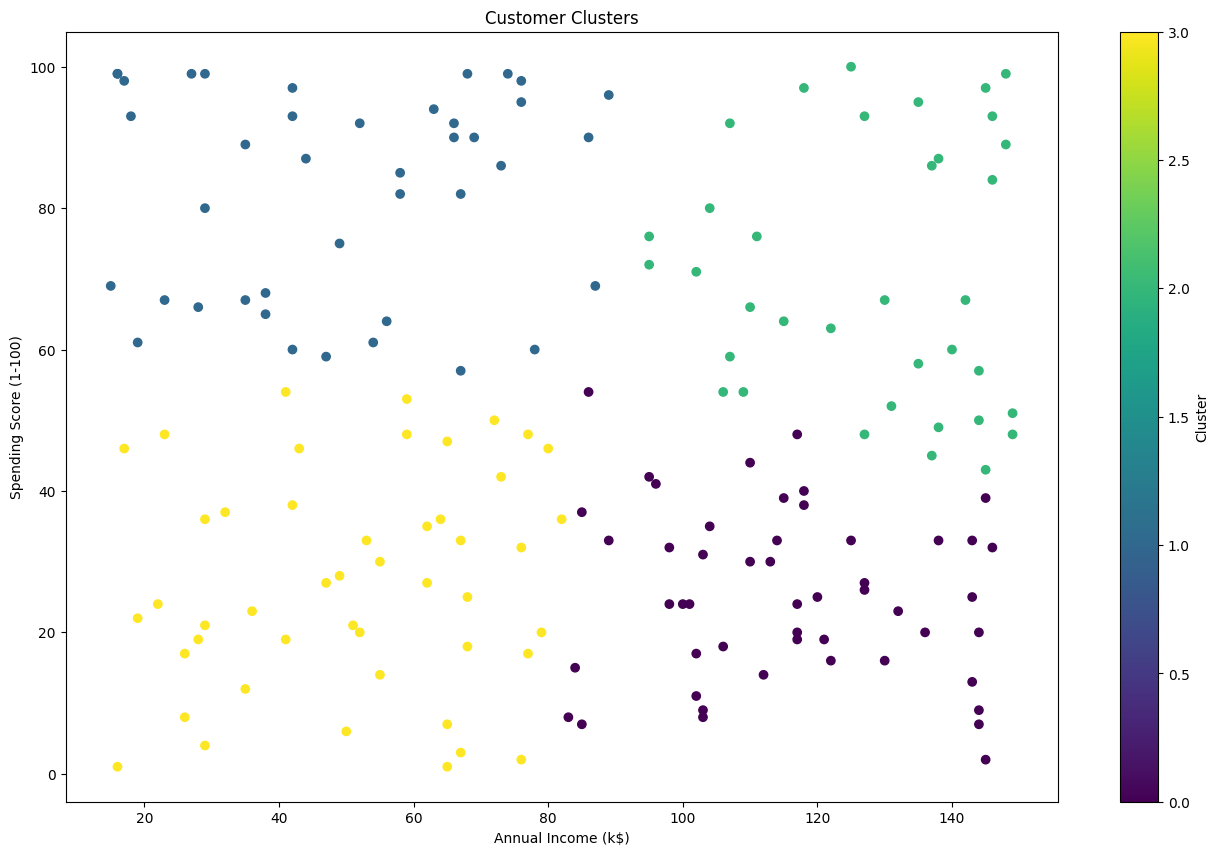

In [17]:
# visualizing the clusters
plt.figure(figsize=(16, 10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [18]:
# Using the elbow method to find the optimal number of clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)    

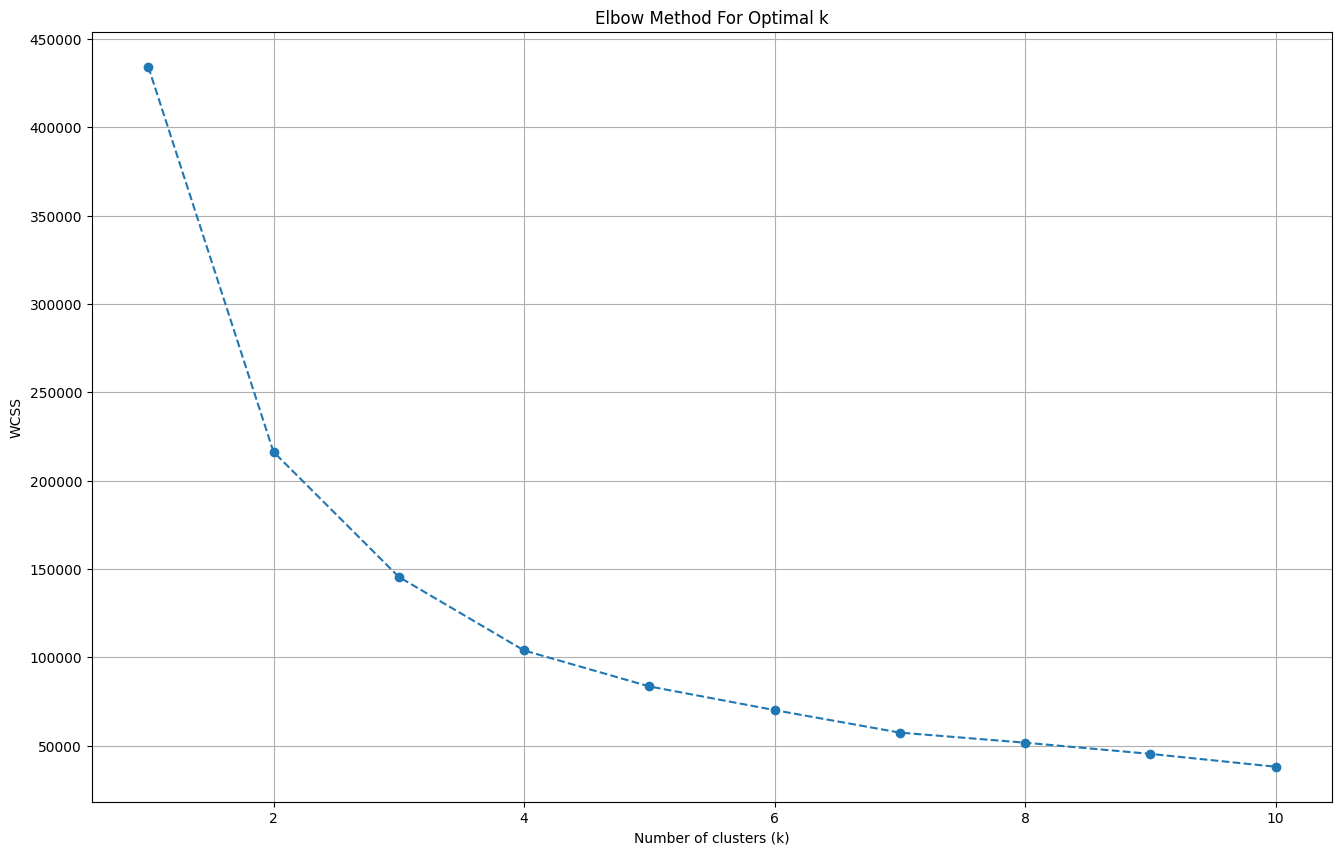

In [19]:
# plotting the elbow method on a graph
plt.figure(figsize=(16, 10))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()